# Magnitude and SNR Cuts

In [1]:
from sorcha.modules.PPBrightLimit import PPBrightLimit
from sorcha.modules.PPMagnitudeLimit import PPMagnitudeLimit
from sorcha.modules.PPSNRLimit import PPSNRLimit
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

There are three filters in the survey simulator that perform simple cuts based on SNR or magnitude, the latter to either drop observations too faint to be interesting or too bright and therefore saturating the detector. These are PPSNRLimit, PPMagnitudeLimit, and PPBrightLimit.

This notebook will demonstrate each in turn. First we generate some randomised (and rather unphysical) test data.

In [2]:
rng = np.random.default_rng()
data_size = 1000

filters = ['r', 'g', 'i']

random_magnitudes = 17.5 + (rng.random(data_size) * 6.5)
random_SNRs = 0.5 + (rng.random(data_size) * 7)
random_filters = rng.choice(filters, data_size)

test_data = pd.DataFrame({'PSFMag': random_magnitudes, 'SNR': random_SNRs, 'optFilter': random_filters})

test_data

,PSFMag,SNR,optFilter
0,18.798190,7.041462,g
1,22.960247,7.128058,i
2,19.188935,6.023712,r
3,20.334172,4.557386,r
4,17.936845,2.761543,i
...,...,...,...
995,18.731509,0.850699,i
996,21.938442,2.095463,g
997,22.701373,3.022979,r
998,19.975528,5.923186,g


Let's look at the magnitude filters first. The below shows the original randomised magnitudes.

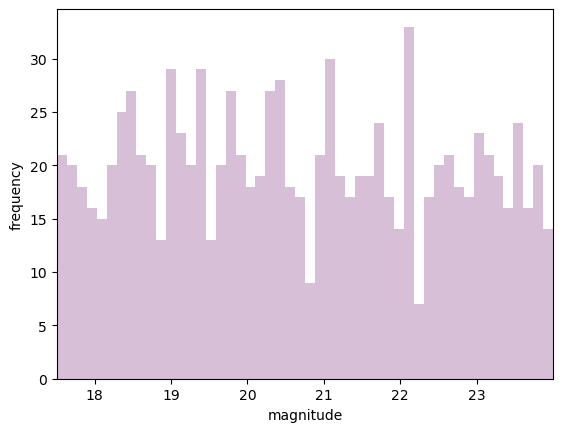

In [3]:
fig, ax = plt.subplots(1)
ax.hist(random_magnitudes, 50, color='thistle')
ax.set_ylabel('frequency')
ax.set_xlabel('magnitude')
ax.autoscale(axis='x', tight=True)

Testing first the magnitude filter for cutting faint objects, we will cut everything fainter than 21 mag.

In [4]:
test_data_maglimit = PPMagnitudeLimit(test_data, 21.,colname='PSFMag')

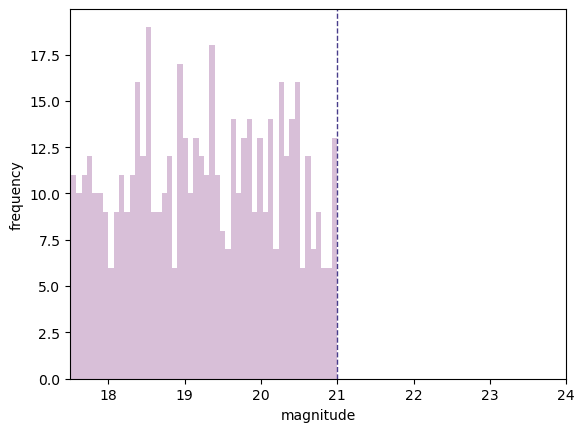

In [5]:
maglimit_magnitudes = test_data_maglimit['PSFMag'].values

fig, ax = plt.subplots(1)
ax.hist(maglimit_magnitudes, 50, color='thistle')
ax.set_ylabel('frequency')
ax.set_xlabel('magnitude')
ax.set_xlim((17.5, 24))
ax.axvline(21, linestyle='--', linewidth=1., color='darkslateblue')

Now we will use the brightness limit filter. This allows the user to set a different saturation limit for each filter. As we have data in g, r and i, we will set the saturation limits as 18, 19 and 20 (chosen for clarity, not accuracy!).

In [6]:
test_data_brightlimit = PPBrightLimit(test_data, filters, [18., 19., 20.])

In [7]:
r_magnitudes = test_data_brightlimit[test_data_brightlimit['optFilter'] == 'r']['PSFMag'].values
g_magnitudes = test_data_brightlimit[test_data_brightlimit['optFilter'] == 'g']['PSFMag'].values
i_magnitudes = test_data_brightlimit[test_data_brightlimit['optFilter'] == 'i']['PSFMag'].values

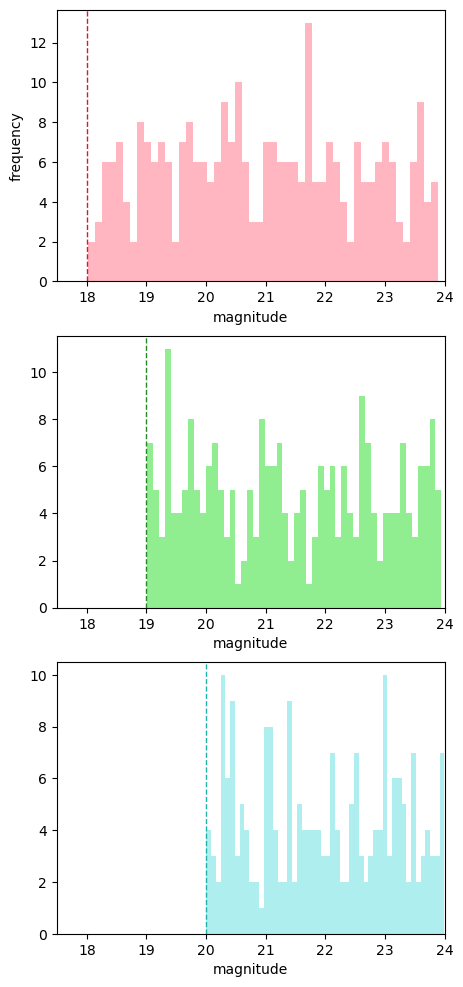

In [8]:
fig, ax = plt.subplots(3, figsize=(5, 12))

ax[0].hist(r_magnitudes, 50, color='lightpink')
ax[0].axvline(18, linestyle='--', linewidth=1., color='crimson')
ax[0].set_ylabel('frequency')

ax[1].hist(g_magnitudes, 50, color='lightgreen')
ax[1].axvline(19, linestyle='--', linewidth=1., color='forestgreen')

ax[2].hist(i_magnitudes, 50, color='paleturquoise')
ax[2].axvline(20, linestyle='--', linewidth=1., color='lightseagreen')

for a in ax:
    a.set_xlabel('magnitude')
    a.set_xlim((17.5, 24))


Alternatively, we can set a single brightness limit of 18.5 across all filters.

In [9]:
test_data_brightlimit_single = PPBrightLimit(test_data, filters, 18.5)

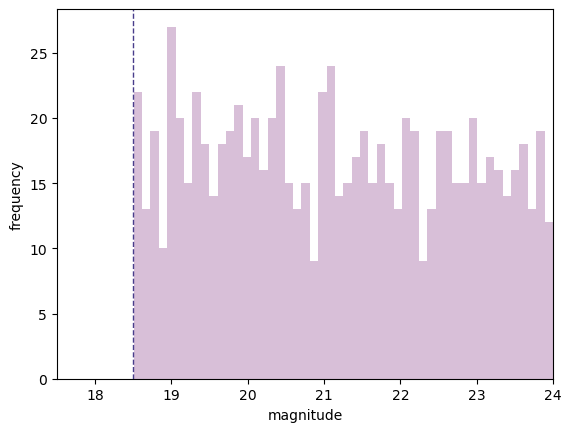

In [10]:
singlelimit_magnitudes = test_data_brightlimit_single['PSFMag'].values

fig, ax = plt.subplots(1)
ax.hist(singlelimit_magnitudes, 50, color='thistle')
ax.set_ylabel('frequency')
ax.set_xlabel('magnitude')
ax.set_xlim((17.5, 24))
ax.axvline(18.5, linestyle='--', linewidth=1., color='darkslateblue')

Now we will look at the SNR limit. First, the original randomised SNRs.

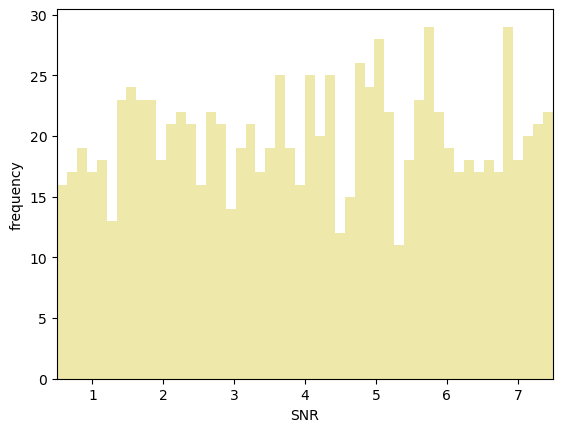

In [11]:
fig, ax = plt.subplots(1)
ax.hist(random_SNRs, 50, color='palegoldenrod')
ax.set_ylabel('frequency')
ax.set_xlabel('SNR')
ax.autoscale(axis='x', tight=True)

Now we will cut everything with an SNR lower than 2 (which is the default in the code).

In [12]:
test_data_SNRlimit = PPSNRLimit(test_data, 2.)

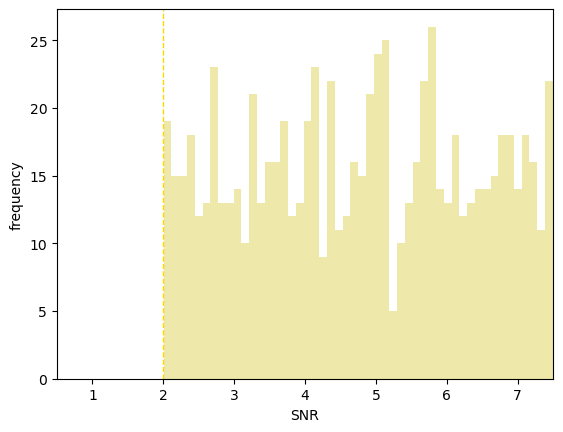

In [13]:
limit_SNRs = test_data_SNRlimit['SNR'].values

fig, ax = plt.subplots(1)
ax.hist(limit_SNRs, 50, color='palegoldenrod')
ax.set_ylabel('frequency')
ax.set_xlabel('SNR')
ax.set_xlim((0.5, 7.5))
ax.axvline(2, linestyle='--', linewidth=1., color='gold')